In [1]:
Mean Squared Error (MSE): 4.0537
Root Mean Squared Error (RMSE): 2.0134
R² Score: 0.6447

MAE: 1.431

In [2]:
# Rings : 전복 수명 (target)
# Diameter : 직경
# Height :  높이
# Length :  길이
# Sex : 성별 (female, male, infant)
# shell weight : 껍질 무게
# shucked weight : 껍질 벗긴 무게
# viscera weight  : 내장 무게
# Whole weight : 전체 무게
    

In [3]:
# 필요한 라이브러리 임포트
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import mean_squared_error, r2_score
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau

def create_features(df, col1, col2, set_col, label_name, df_update=False):

    operations = [
        lambda x, y: 2 * x + y,
        lambda x, y: 2 * x - y,
        lambda x, y: 2 * x / y,
        lambda x, y: 2 * x * y,
        lambda x, y: 3 * x + y,
        lambda x, y: 3 * x - y,
        lambda x, y: 3 * x / y,
        lambda x, y: 3 * x * y
    ]
    max_corr = 0
    best_op = None

    for op in operations:
        df[set_col] = op(df[col1], df[col2])
        corr = df.corr()[set_col][label_name]
        if np.abs(corr) > max_corr:
            max_corr = np.abs(corr)
            best_op = op

    if df_update:
        df[set_col] = best_op(df[col1], df[col2])
    
    if df_update != False:
        return df
    else:
        return max_corr

def create_features3(df, col1, col2, col3, set_col, label_name, df_update=False):

    operations = [
        lambda x, y, z: x + y + z,
        lambda x, y, z: x * y * z,
        lambda x, y, z: x - y - z,
        lambda x, y, z: x / y / z,
        lambda x, y, z: x / y + z,
        lambda x, y, z: (x + y) * z,
        lambda x, y, z: x - y * z,
        lambda x, y, z: 2 * x * y / z,
        lambda x, y, z: x / y - z,
        lambda x, y, z: x * y - z,
        lambda x, y, z: x + y - z
    ]
    max_corr = 0
    best_op = None

    for op in operations:
        df[set_col] = op(df[col1], df[col2], df[col3])
        corr = df.corr()[set_col][label_name]
        if np.abs(corr) > max_corr:
            max_corr = np.abs(corr)
            best_op = op

    if df_update:
        df[set_col] = best_op(df[col1], df[col2], df[col3])

    if df_update != False:
        return df
    else:
        return max_corr


### 사용법

# #2가지 변수를 활용한 새로운 파생변수 생성

# max_result = 0
# max_result_total = 0

# X_features = data.drop(['Rings','Sex'],axis=1)
# for col1 in X_features.columns:
#     for col2 in X_features.columns: 
#         if (col1=='Rings')|(col2=='bcd'):
#             continue
#         else:
#             result = create_features(data, col1, col2,'new5','Rings')
# #             print(result,col1,col2)
#             if max_result < abs(result):
#                 max_result = result
#                 print(max_result)
#                 columns = [col1, col2]
# data = create_features(data,columns[0],columns[1],'new5','Rings',df_update=True)



C:\Users\Hyeon\anaconda3\Lib\site-packages\pandas\core\arrays\masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


In [4]:


# 데이터 로드
url = 'https://raw.githubusercontent.com/MyungKyuYi/AI-class/main/abalone.csv'
data = pd.read_csv(url)

data


,id,Sex,Length,Diameter,Height,Whole_weight,Shucked_weight,Viscera_weight,Shell_weight,Rings
0,0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.1500,15
1,1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.0700,7
2,2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.2100,9
3,3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.1550,10
4,4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.0550,7
...,...,...,...,...,...,...,...,...,...,...
4172,4172,F,0.565,0.450,0.165,0.8870,0.3700,0.2390,0.2490,11
4173,4173,M,0.590,0.440,0.135,0.9660,0.4390,0.2145,0.2605,10
4174,4174,M,0.600,0.475,0.205,1.1760,0.5255,0.2875,0.3080,9
4175,4175,F,0.625,0.485,0.150,1.0945,0.5310,0.2610,0.2960,10


In [5]:
# 결측치 확인
missing_values = data.isnull().sum()
print(missing_values)

id                0
Sex               0
Length            0
Diameter          0
Height            0
Whole_weight      0
Shucked_weight    0
Viscera_weight    0
Shell_weight      0
Rings             0
dtype: int64


In [6]:
summary = data.describe()
print(summary)

                id       Length     Diameter       Height  Whole_weight  \
count  4177.000000  4177.000000  4177.000000  4177.000000   4177.000000   
mean   2088.000000     0.523992     0.407881     0.139516      0.828742   
std    1205.940366     0.120093     0.099240     0.041827      0.490389   
min       0.000000     0.075000     0.055000     0.000000      0.002000   
25%    1044.000000     0.450000     0.350000     0.115000      0.441500   
50%    2088.000000     0.545000     0.425000     0.140000      0.799500   
75%    3132.000000     0.615000     0.480000     0.165000      1.153000   
max    4176.000000     0.815000     0.650000     1.130000      2.825500   

       Shucked_weight  Viscera_weight  Shell_weight        Rings  
count     4177.000000     4177.000000   4177.000000  4177.000000  
mean         0.359367        0.180594      0.238831     9.933684  
std          0.221963        0.109614      0.139203     3.224169  
min          0.001000        0.000500      0.001500     

In [7]:
# id 컬럼 제거
data.drop('id', axis=1, inplace=True)
data

,Sex,Length,Diameter,Height,Whole_weight,Shucked_weight,Viscera_weight,Shell_weight,Rings
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.1500,15
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.0700,7
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.2100,9
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.1550,10
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.0550,7
...,...,...,...,...,...,...,...,...,...
4172,F,0.565,0.450,0.165,0.8870,0.3700,0.2390,0.2490,11
4173,M,0.590,0.440,0.135,0.9660,0.4390,0.2145,0.2605,10
4174,M,0.600,0.475,0.205,1.1760,0.5255,0.2875,0.3080,9
4175,F,0.625,0.485,0.150,1.0945,0.5310,0.2610,0.2960,10


In [8]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
data['Sex'] = le.fit_transform(data['Sex'])

data

,Sex,Length,Diameter,Height,Whole_weight,Shucked_weight,Viscera_weight,Shell_weight,Rings
0,2,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.1500,15
1,2,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.0700,7
2,0,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.2100,9
3,2,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.1550,10
4,1,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.0550,7
...,...,...,...,...,...,...,...,...,...
4172,0,0.565,0.450,0.165,0.8870,0.3700,0.2390,0.2490,11
4173,2,0.590,0.440,0.135,0.9660,0.4390,0.2145,0.2605,10
4174,2,0.600,0.475,0.205,1.1760,0.5255,0.2875,0.3080,9
4175,0,0.625,0.485,0.150,1.0945,0.5310,0.2610,0.2960,10


In [9]:
# Rings와 다른 특성간의 상관관계 확인

data = data.set_index('Rings').reset_index()
data.corr()


,Rings,Sex,Length,Diameter,Height,Whole_weight,Shucked_weight,Viscera_weight,Shell_weight
Rings,1.000000,-0.034627,0.556720,0.574660,0.557467,0.540390,0.420884,0.503819,0.627574
Sex,-0.034627,1.000000,-0.036066,-0.038874,-0.042077,-0.021391,-0.001373,-0.032067,-0.034854
Length,0.556720,-0.036066,1.000000,0.986812,0.827554,0.925261,0.897914,0.903018,0.897706
Diameter,0.574660,-0.038874,0.986812,1.000000,0.833684,0.925452,0.893162,0.899724,0.905330
Height,0.557467,-0.042077,0.827554,0.833684,1.000000,0.819221,0.774972,0.798319,0.817338
Whole_weight,0.540390,-0.021391,0.925261,0.925452,0.819221,1.000000,0.969405,0.966375,0.955355
Shucked_weight,0.420884,-0.001373,0.897914,0.893162,0.774972,0.969405,1.000000,0.931961,0.882617
Viscera_weight,0.503819,-0.032067,0.903018,0.899724,0.798319,0.966375,0.931961,1.000000,0.907656
Shell_weight,0.627574,-0.034854,0.897706,0.905330,0.817338,0.955355,0.882617,0.907656,1.000000


In [10]:
# 특성의 상관계수가 0.7이 넘지 않음, 특성공학 필요성

In [11]:
# Rings 별 특성들의 영향 정도 확인

In [12]:
data.groupby('Rings').mean()

,Sex,Length,Diameter,Height,Whole_weight,Shucked_weight,Viscera_weight,Shell_weight
Rings,,,,,,,,
1,1.000000,0.075000,0.055000,0.010000,0.002000,0.001000,0.000500,0.001500
2,1.000000,0.150000,0.100000,0.025000,0.015000,0.004500,0.004000,0.005000
3,1.200000,0.176000,0.128667,0.041667,0.028400,0.011767,0.006267,0.008933
4,1.105263,0.221491,0.161579,0.053947,0.059605,0.024719,0.012956,0.018000
5,1.060870,0.285739,0.210696,0.069913,0.125500,0.061696,0.027330,0.036770
6,1.042471,0.369363,0.278861,0.091776,0.273174,0.123158,0.058371,0.078388
7,1.092072,0.422033,0.321535,0.105921,0.397386,0.182657,0.085899,0.111648
8,1.088028,0.498776,0.384798,0.128556,0.640753,0.293773,0.138502,0.178609
9,1.058055,0.546865,0.425218,0.142721,0.852013,0.387938,0.187803,0.236509


In [13]:
epsilon = 1e-8

data['Water'] = data['Whole_weight'] - data['Shucked_weight'] - data['Viscera_weight'] - data['Shell_weight']

#Whole Weight 범주화
data['Whole_weight'] = data['Whole_weight'].map(lambda x: 1 if x <= 0.5 else (2 if x <= 1 else (3 if x<=2.5 else 4)))

#임시변수
data['new1'] = data['Length'] + data['Diameter'] + data['Height']
data['new2'] = data['Length'] * data['Diameter'] * data['Height']
data['new3'] = data['Shell_weight']+data['Height']
data['new4'] = data['Shell_weight'] / data['Whole_weight']


data = data.set_index('Rings').reset_index()
data.corr()

,Rings,Sex,Length,Diameter,Height,Whole_weight,Shucked_weight,Viscera_weight,Shell_weight,Water,new1,new2,new3,new4
Rings,1.000000,-0.034627,0.556720,0.574660,0.557467,0.512916,0.420884,0.503819,0.627574,0.499294,0.578377,0.544952,0.632238,0.588119
Sex,-0.034627,1.000000,-0.036066,-0.038874,-0.042077,-0.023312,-0.001373,-0.032067,-0.034854,-0.031317,-0.039091,-0.037727,-0.037770,-0.038631
Length,0.556720,-0.036066,1.000000,0.986812,0.827554,0.878800,0.897914,0.903018,0.897706,0.525002,0.992633,0.917937,0.911576,0.714361
Diameter,0.574660,-0.038874,0.986812,1.000000,0.833684,0.879896,0.893162,0.899724,0.905330,0.532715,0.992560,0.923353,0.919104,0.724270
Height,0.557467,-0.042077,0.827554,0.833684,1.000000,0.769516,0.774972,0.798319,0.817338,0.489721,0.879896,0.905318,0.888873,0.652766
Whole_weight,0.512916,-0.023312,0.878800,0.879896,0.769516,1.000000,0.873422,0.879721,0.866728,0.537588,0.884218,0.875371,0.873076,0.440209
Shucked_weight,0.420884,-0.001373,0.897914,0.893162,0.774972,0.873422,1.000000,0.931961,0.882617,0.489119,0.899306,0.922982,0.887015,0.590616
Viscera_weight,0.503819,-0.032067,0.903018,0.899724,0.798319,0.879721,0.931961,1.000000,0.907656,0.535139,0.908110,0.933789,0.912504,0.627261
Shell_weight,0.627574,-0.034854,0.897706,0.905330,0.817338,0.866728,0.882617,0.907656,1.000000,0.583638,0.910915,0.938357,0.990479,0.779891
Water,0.499294,-0.031317,0.525002,0.532715,0.489721,0.537588,0.489119,0.535139,0.583638,1.000000,0.535922,0.565920,0.581113,0.399390


In [14]:
#2가지 변수를 활용한 새로운 파생변수 생성

max_result = 0
max_result_total = 0

X_features = data.drop(['Rings','Sex'],axis=1)
for col1 in X_features.columns:
    for col2 in X_features.columns: 
        result = create_features(data, col1, col2,'new5','Rings')
#             print(result,col1,col2)
        if max_result < abs(result):
            max_result = result
            print(max_result)
            columns = [col1, col2]
data = create_features(data,columns[0],columns[1],'new5','Rings',df_update=True)

0.5567195769296183
0.5635045502751335
0.5693712966481796
0.5970773185643967
0.6318490744203564
0.6689083585983354
0.6883295542726247
0.6939928919534759


In [15]:
# 3가지 변수를 활용한 새로운 파생변수 생성

print("a1")
max_result = 0
max_result_total = 0

X_features = data.drop(['Rings','Sex','new5'],axis=1)
for col1 in X_features.columns:
    for col2 in X_features.columns: 
        for col3 in X_features.columns: 
            result = create_features3(data, col1, col2, col3,'a1','Rings')
#             print(result,col1,col2, col3)
            if max_result < abs(result):
                max_result = result
                print(max_result)
                columns = [col1, col2, col3]
data = create_features3(data,columns[0],columns[1],columns[2],'a1','Rings',df_update=True)


print("a2")
max_result = 0
max_result_total = 0

X_features = data.drop(['Rings','Sex','new5'],axis=1)
for col1 in X_features.columns:
    for col2 in X_features.columns: 
        for col3 in X_features.columns: 
            result = create_features3(data, col1, col2, col3,'a2','Rings')
#             print(result,col1,col2, col3)
            if max_result < abs(result):
                max_result = result
                print(max_result)
                columns = [col1, col2, col3]
data = create_features3(data,columns[0],columns[1],columns[2],'a2','Rings',df_update=True)



print("a3")
max_result = 0
max_result_total = 0
col_lists = ['a1','a2']    

X_features = data.drop(['Rings','Sex','new5'],axis=1)
for col1 in col_lists:
    for col2 in X_features.columns: 
        for col3 in X_features.columns: 
            result = create_features3(data, col1, col2, col3,'a3','Rings')
#             print(result,col1,col2, col3)
            if max_result < abs(result):
                max_result = result
                print(max_result)
                columns = [col1, col2, col3]
data = create_features3(data,columns[0],columns[1],columns[2],'a3','Rings',df_update=True)


print("a4")
max_result = 0
max_result_total = 0
col_lists = ['a1','a2','a3']    

X_features = data.drop(['Rings','Sex','new5'],axis=1)
for col1 in col_lists:
    for col2 in X_features.columns: 
        for col3 in X_features.columns: 
            result = create_features3(data, col1, col2, col3,'a4','Rings')
#             print(result,col1,col2, col3)
            if max_result < abs(result):
                max_result = result
                print(max_result)
                columns = [col1, col2, col3]
data = create_features3(data,columns[0],columns[1],columns[2],'a4','Rings',df_update=True)

print("a5")
max_result = 0
max_result_total = 0
col_lists = ['a1','a2','a3','a4']    

X_features = data.drop(['Rings','Sex','new5'],axis=1)
for col1 in col_lists:
    for col2 in X_features.columns: 
        for col3 in X_features.columns: 
            result = create_features3(data, col1, col2, col3,'a5','Rings')
#             print(result,col1,col2, col3)
            if max_result < abs(result):
                max_result = result
                print(max_result)
                columns = [col1, col2, col3]
data = create_features3(data,columns[0],columns[1],columns[2],'a5','Rings',df_update=True)

print("a6")
max_result = 0
max_result_total = 0
col_lists = ['a1','a2','a3','a4','a5']    

X_features = data.drop(['Rings','Sex','new5'],axis=1)
for col1 in col_lists:
    for col2 in X_features.columns: 
        for col3 in X_features.columns: 
            result = create_features3(data, col1, col2, col3,'a6','Rings')
#             print(result,col1,col2, col3)
            if max_result < abs(result):
                max_result = result
                print(max_result)
                columns = [col1, col2, col3]
data = create_features3(data,columns[0],columns[1],columns[2],'a6','Rings',df_update=True)






a1
0.5567195769296179
0.5746598513059246
0.6275740445103186
0.6322379738319487
0.6378193872428594
0.6406060069890301
0.6577139454031309
0.6705331932807177
0.6759122463093918
0.6866185223926238
0.6882815373697577
0.6902143882650073
0.6939928919534759
a2
0.5567195769296179
0.5746598513059246
0.6275740445103186
0.6322379738319487
0.693992891953477
0.7004599166173235
0.706048725408971
0.7115737823364638
0.7120449474886289
0.7176524332521516
0.7184302317764523
0.721534535769365
a3
0.6941675456114782
0.7004599166173235
0.711573782336464
0.7176524332521517
0.7184302317764523
0.721534535769365
0.7247182508476193
0.7307587089173008
0.7313304954926989
0.7345784429051719
a4
0.6941675456114782
0.7004599166173235
0.711573782336464
0.7176524332521517
0.721729913562392
0.7293085032271429
0.7369012673239188
a5
0.6941675456114782
0.7004599166173235
0.711573782336464
0.7272606083858543
0.729915907586066
0.7299278404485875
0.7369012673239188
0.7369012673239189
0.7376549699524553
0.7380095552281094
0.7382

In [16]:
# Rings와 다른 특성간의 상관관계 확인

data = data.set_index('Rings').reset_index()
data.corr()


,Rings,Sex,Length,Diameter,Height,Whole_weight,Shucked_weight,Viscera_weight,Shell_weight,Water,...,new2,new3,new4,new5,a1,a2,a3,a4,a5,a6
Rings,1.000000,-0.034627,0.556720,0.574660,0.557467,0.512916,0.420884,0.503819,0.627574,0.499294,...,0.544952,0.632238,0.588119,0.693993,-0.693993,-0.721535,-0.734578,0.736901,0.738779,0.740080
Sex,-0.034627,1.000000,-0.036066,-0.038874,-0.042077,-0.023312,-0.001373,-0.032067,-0.034854,-0.031317,...,-0.037727,-0.037770,-0.038631,-0.070080,0.070080,0.063261,0.061778,-0.060649,-0.061950,-0.062020
Length,0.556720,-0.036066,1.000000,0.986812,0.827554,0.878800,0.897914,0.903018,0.897706,0.525002,...,0.917937,0.911576,0.714361,0.650145,-0.650145,-0.752978,-0.729790,0.720426,0.708234,0.709818
Diameter,0.574660,-0.038874,0.986812,1.000000,0.833684,0.879896,0.893162,0.899724,0.905330,0.532715,...,0.923353,0.919104,0.724270,0.670162,-0.670162,-0.777776,-0.753664,0.744699,0.733723,0.735428
Height,0.557467,-0.042077,0.827554,0.833684,1.000000,0.769516,0.774972,0.798319,0.817338,0.489721,...,0.905318,0.888873,0.652766,0.755055,-0.755055,-0.785793,-0.749954,0.726818,0.719798,0.722502
Whole_weight,0.512916,-0.023312,0.878800,0.879896,0.769516,1.000000,0.873422,0.879721,0.866728,0.537588,...,0.875371,0.873076,0.440209,0.606513,-0.606513,-0.685058,-0.677482,0.665708,0.648647,0.649626
Shucked_weight,0.420884,-0.001373,0.897914,0.893162,0.774972,0.873422,1.000000,0.931961,0.882617,0.489119,...,0.922982,0.887015,0.590616,0.480578,-0.480578,-0.574109,-0.558688,0.539951,0.510175,0.511224
Viscera_weight,0.503819,-0.032067,0.903018,0.899724,0.798319,0.879721,0.931961,1.000000,0.907656,0.535139,...,0.933789,0.912504,0.627261,0.610911,-0.610911,-0.689386,-0.674265,0.657271,0.629212,0.630377
Shell_weight,0.627574,-0.034854,0.897706,0.905330,0.817338,0.866728,0.882617,0.907656,1.000000,0.583638,...,0.938357,0.990479,0.779891,0.818417,-0.818417,-0.866822,-0.846809,0.830740,0.815635,0.815810
Water,0.499294,-0.031317,0.525002,0.532715,0.489721,0.537588,0.489119,0.535139,0.583638,1.000000,...,0.565920,0.581113,0.399390,0.514736,-0.514736,-0.538374,-0.718107,0.721677,0.665867,0.672451


In [71]:

X = data.drop(['Rings','new1','new2','new3','new4','new5','a1','a3','a4','a5','a6'], axis=1)
X = pd.get_dummies(X,columns=['Sex'])
y = data['Rings']


# 데이터 스케일링
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# 데이터의 형태를 CNN에 적합하게 변환
X_scaled = X_scaled.reshape((X_scaled.shape[0], X_scaled.shape[1], 1))

# 데이터를 훈련 세트와 테스트 세트로 분할
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

In [79]:
from tensorflow.keras.layers import Input, Conv1D, MaxPooling1D, Flatten, Dense, Add, ReLU
from tensorflow.keras.models import Model

input_layer = Input(shape=(X_train.shape[1], 1))

# 첫 번째 컨볼루션 블록
x = Conv1D(64, 2, padding='same')(input_layer)
x = ReLU()(x)
x = MaxPooling1D(2)(x)

# 두 번째 컨볼루션 블록
x = Conv1D(128, 2, padding='same')(x)
x = ReLU()(x)
x = MaxPooling1D(2)(x)


# 스킵 커넥션을 위해 차원 조정
skip_connection = Conv1D(128, 1, padding='same')(input_layer)
skip_connection = MaxPooling1D(4)(skip_connection)  # 2번의 MaxPooling1D 적용

x = Add()([x, skip_connection])  # 메인 경로와 스킵 커넥션 합치기
x = ReLU()(x)

# 플래튼 및 완전 연결층
x = Flatten()(x)
x = Dense(256, activation='relu')(x)
output_layer = Dense(1)(x)

# 모델 구성
model = Model(inputs=input_layer, outputs=output_layer)


model.compile(optimizer=Adam(learning_rate=0.001), loss='mse')

# 모델 요약
model.summary()

# 콜백 정의
early_stopping = EarlyStopping(monitor='val_loss', patience=10, verbose=1, mode='min', restore_best_weights=True)
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=5, min_lr=0.0001, verbose=1)

# 모델 훈련
history = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=200, batch_size=32, verbose=1, callbacks=[early_stopping, reduce_lr])



Model: "functional_25"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                  ┃ Output Shape              ┃         Param # ┃ Connected to               ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_layer_28 (InputLayer)   │ (None, 13, 1)             │               0 │ -                          │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ conv1d_76 (Conv1D)            │ (None, 13, 64)            │             192 │ input_layer_28[0][0]       │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ re_lu_58 (ReLU)               │ (None, 13, 64)            │               0 │ conv1d_76[0][0]            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ max_pooling1d_74              │ (None, 6, 64)             │               0 │ re_lu_58[0][0]             │
│ (MaxPooling1D)                │                           │                 │                            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ conv1d_77 (Conv1D)            │ (None, 6, 128)            │          16,512 │ max_pooling1d_74[0][0]     │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ re_lu_59 (ReLU)               │ (None, 6, 128)            │               0 │ conv1d_77[0][0]            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ conv1d_78 (Conv1D)            │ (None, 13, 128)           │             256 │ input_layer_28[0][0]       │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ max_pooling1d_75              │ (None, 3, 128)            │               0 │ re_lu_59[0][0]             │
│ (MaxPooling1D)                │                           │                 │                            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ max_pooling1d_76              │ (None, 3, 128)            │               0 │ conv1d_78[0][0]            │
│ (MaxPooling1D)                │                           │                 │                            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ add_20 (Add)                  │ (None, 3, 128)            │               0 │ max_pooling1d_75[0][0],    │
│                               │                           │                 │ max_pooling1d_76[0][0]     │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ re_lu_60 (ReLU)               │ (None, 3, 128)            │               0 │ add_20[0][0]               │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ flatten_26 (Flatten)          │ (None, 384)               │               0 │ re_lu_60[0][0]             │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ dense_60 (Dense)              │ (None, 256)               │          98,560 │ flatten_26[0][0]           │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ dense_61 (Dense)              │ (None, 1)                 │             257 │ dense_60[0][0]             │
└───────────────────────────────┴───────────────────────────┴─────────────────┴────────────────────────────┘

 Total params: 115,777 (452.25 KB)

 Trainable params: 115,777 (452.25 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/200
105/105 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 35.7986 - val_loss: 8.7366 - learning_rate: 0.0010
Epoch 2/200
105/105 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 7.3468 - val_loss: 6.0368 - learning_rate: 0.0010
Epoch 3/200
105/105 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 5.4309 - val_loss: 5.0864 - learning_rate: 0.0010
Epoch 4/200
105/105 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 4.7749 - val_loss: 4.8495 - learning_rate: 0.0010
Epoch 5/200
105/105 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 4.4483 - val_loss: 4.5496 - learning_rate: 0.0010
Epoch 6/200
105/105 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 4.3588 - val_loss: 4.5285 - learning_rate: 0.0010
Epoch 7/200
105/105 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 4.0330 - val_loss: 4.4865 - learning_rate: 0.0010
Epoch 8/200
105/105 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 4.7425 - val_loss: 4.9582 - learning_rate: 0.0010
Epoch 9/200
105/105 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 4.3714 - val_loss: 4.5771 - learning_rate: 0.0010


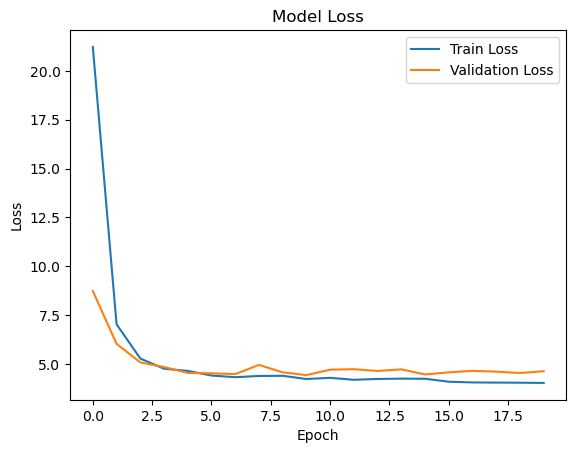

27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
Mean Squared Error (MSE): 4.4353
Root Mean Squared Error (RMSE): 2.1060
R² Score: 0.6113


In [80]:

import matplotlib.pyplot as plt

# 훈련 과정 시각화
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend()
plt.show()

# 성능 평가
y_pred = model.predict(X_test).flatten()
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print(f'Mean Squared Error (MSE): {mse:.4f}')
print(f'Root Mean Squared Error (RMSE): {rmse:.4f}')
print(f'R² Score: {r2:.4f}')

In [ ]:
------------------------------------------------------------------------------

In [7]:
# 필요한 라이브러리 임포트
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam
import matplotlib.pyplot as plt

# 데이터 로드
url = 'https://raw.githubusercontent.com/MyungKyuYi/AI-class/main/abalone.csv'
data = pd.read_csv(url)

# 범주형 데이터 수치형으로 변환
label_encoder = LabelEncoder()
data['Sex'] = label_encoder.fit_transform(data['Sex'])


def feature_eng(df):
    
    # 특성 엔지니어링
    df['Length_to_Diameter'] = df['Length'] / df['Diameter']
    df['Weight_Ratio'] = df['Shucked_weight'] / df['Whole_weight']

    df['Water'] = df['Whole_weight'] - df['Shucked_weight'] - df['Viscera_weight'] - df['Shell_weight']
    df['new'] = df['Shell_weight']+df['Height']
    df['Length_Diameter_Product'] = df['Length'] * df['Diameter']
    df['Shell_Weight_Ratio'] = df['Shell_weight'] / df['Whole_weight']

    # 부피와 밀도 계산 전에 0으로 나누는 것을 방지
    df['Volume'] = df['Length'] * df['Height'] * df['Diameter']
    df['Density'] = df['Whole_weight'] / df['Volume']
    df.replace([np.inf, -np.inf], np.nan, inplace=True)  # 무한대 값 NaN으로 대체
    df.dropna(inplace=True)  # NaN 값 제거
    
    return df

# 특성공학 
data = feature_eng(data)


# 특성과 타겟 분리
X = data.drop(['Rings'], axis=1)
y = data['Rings']

# 데이터 스케일링
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)



# 데이터 분할
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)


In [8]:
from tensorflow.keras.layers import Conv1D, Flatten, BatchNormalization, MaxPooling1D

# 데이터의 형태를 (샘플 수, 특성 수, 1)로 변환하여 CNN에 적용할 수 있도록 변경
X_train_cnn = X_train.reshape((X_train.shape[0], X_train.shape[1], 1))
X_test_cnn = X_test.reshape((X_test.shape[0], X_test.shape[1], 1))

# CNN 모델 구성
model = Sequential([
    Conv1D(64, kernel_size=2, activation='relu', input_shape=(X_train_cnn.shape[1], 1)),
    MaxPooling1D(pool_size=2),
    BatchNormalization(),
    Conv1D(128, kernel_size=2, activation='relu'),
    MaxPooling1D(pool_size=2),
    Flatten(),
    Dense(64, activation='relu'),
    Dropout(0.5),
    Dense(32, activation='relu'),
    Dropout(0.3),
    Dense(1, activation='linear')
])

# 모델 컴파일
model.compile(optimizer=Adam(learning_rate=0.001), loss='mean_squared_error')




C:\Users\Hyeon\anaconda3\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [9]:
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau

# 콜백 정의
early_stopping = EarlyStopping(monitor='val_loss', patience=30, verbose=1, mode='min', restore_best_weights=True)
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=30, verbose=1)

# 모델 훈련
history = model.fit(X_train_cnn, y_train, validation_data=(X_test_cnn, y_test), epochs=1000, batch_size=32, verbose=1, callbacks=[early_stopping, reduce_lr])


Epoch 1/1000
105/105 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 32.9602 - val_loss: 82.2909 - learning_rate: 0.0010
Epoch 2/1000
105/105 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 13.7123 - val_loss: 57.0628 - learning_rate: 0.0010
Epoch 3/1000
105/105 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 12.5288 - val_loss: 35.4701 - learning_rate: 0.0010
Epoch 4/1000
105/105 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 11.4714 - val_loss: 25.0278 - learning_rate: 0.0010
Epoch 5/1000
105/105 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 12.0964 - val_loss: 12.7800 - learning_rate: 0.0010
Epoch 6/1000
105/105 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 11.0672 - val_loss: 12.3840 - learning_rate: 0.0010
Epoch 7/1000
105/105 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 9.9158 - val_loss: 10.5123 - learning_rate: 0.0010
Epoch 8/1000
105/105 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 9.8137 - val_loss: 9.4045 - learning_rate: 0.0010
Epoch 9/1000
105/105 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 10.4177 - val_loss: 6.1970 - 

105/105 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 5.2036 - val_loss: 4.6281 - learning_rate: 0.0010
Epoch 57/1000
105/105 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 5.5661 - val_loss: 4.4217 - learning_rate: 0.0010
Epoch 58/1000
105/105 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 5.0813 - val_loss: 4.4879 - learning_rate: 0.0010
Epoch 59/1000
105/105 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 5.0931 - val_loss: 4.7267 - learning_rate: 0.0010
Epoch 60/1000
105/105 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 5.1619 - val_loss: 4.2232 - learning_rate: 0.0010
Epoch 61/1000
105/105 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 5.0383 - val_loss: 4.7772 - learning_rate: 0.0010
Epoch 62/1000
105/105 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 5.5032 - val_loss: 4.3314 - learning_rate: 0.0010
Epoch 63/1000
105/105 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 5.4209 - val_loss: 4.2216 - learning_rate: 0.0010
Epoch 64/1000
105/105 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 5.4683 - val_loss: 4.2990 - learning_rate: 0.00

Epoch 112/1000
105/105 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 4.1429 - val_loss: 4.7734 - learning_rate: 0.0010
Epoch 113/1000
105/105 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 4.4579 - val_loss: 5.0397 - learning_rate: 0.0010
Epoch 114/1000
105/105 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 3.7849 - val_loss: 4.4452 - learning_rate: 0.0010
Epoch 115/1000
105/105 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 3.9388 - val_loss: 4.6622 - learning_rate: 0.0010
Epoch 116/1000
105/105 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 4.6180 - val_loss: 4.4899 - learning_rate: 0.0010
Epoch 117/1000
105/105 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 3.6271 - val_loss: 4.7700 - learning_rate: 0.0010
Epoch 118/1000
105/105 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 4.3950 - val_loss: 4.4877 - learning_rate: 0.0010
Epoch 119/1000
105/105 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 3.7971 - val_loss: 4.3353 - learning_rate: 0.0010
Epoch 120/1000
105/105 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 4.2357 - val_loss: 4.723

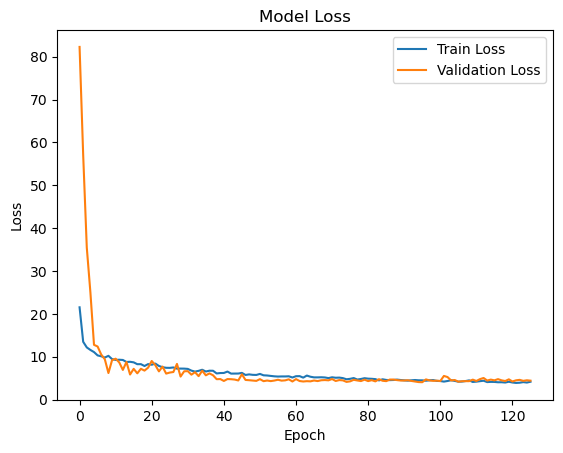

27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step
Mean Squared Error (MSE): 4.0537
Root Mean Squared Error (RMSE): 2.0134
R² Score: 0.6447
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 959us/step
MAE: 1.431


In [10]:
# 훈련 과정 시각화
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend()
plt.show()

# 성능 평가
y_pred = model.predict(X_test).flatten()
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print(f'Mean Squared Error (MSE): {mse:.4f}')
print(f'Root Mean Squared Error (RMSE): {rmse:.4f}')
print(f'R² Score: {r2:.4f}')

yhat = model.predict(X_test)
error = mean_absolute_error(y_test, yhat)
print('MAE: %.3f' % error)



